# Simple Linear Regression explained 

In [1]:
x  <- c(4, 6, 9, 10, 4, 6, 4, 7, 8, 7)
y  <- c(5, 6, 8, 10, 4, 8, 4, 9, 8, 9)

df <- data.frame(x , y)

linear_model <- lm(y ~ x , data = df )

In [2]:
dim(df)

[1] 10  2

In [3]:
str(df)

'data.frame':	10 obs. of  2 variables:
 $ x: num  4 6 9 10 4 6 4 7 8 7
 $ y: num  5 6 8 10 4 8 4 9 8 9


In [4]:
linear_model


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
     1.2420       0.9012  


In [5]:
summary(linear_model)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3531 -0.7975 -0.3531  1.0512  1.4494 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.2420     1.1957   1.039 0.329319    
x             0.9012     0.1757   5.129 0.000898 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.118 on 8 degrees of freedom
Multiple R-squared:  0.7668,	Adjusted R-squared:  0.7376 
F-statistic:  26.3 on 1 and 8 DF,  p-value: 0.0008976


In [6]:
summary(linear_model)$r.squared 

[1] 0.7667847

In [7]:
summary(linear_model)$adj.r.squared

[1] 0.7376327

In [8]:
summary(linear_model)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.2419753,1.1957082,1.038694,0.329318987
x,0.9012346,0.1757255,5.128651,0.000897576


In [9]:
summary(linear_model)$fstatistic

value    numdf    dendf 
26.30306  1.00000  8.00000

In [10]:
summary(linear_model)$residuals

1          2          3          4          5          6          7 
 0.1530864 -0.6493827 -1.3530864 -0.2543210 -0.8469136  1.3506173 -0.8469136 
         8          9         10 
 1.4493827 -0.4518519  1.4493827

In [11]:
deviance(linear_model) #residual sum of squares

[1] 10.00494

In [12]:
predict(linear_model)

1         2         3         4         5         6         7         8 
 4.846914  6.649383  9.353086 10.254321  4.846914  6.649383  4.846914  7.550617 
        9        10 
 8.451852  7.550617

In [13]:
p <- predict(linear_model)

In [14]:
rss <- c(crossprod(y - p)) # y given values[ observed value] , p = predicted values from model 

In [15]:
rss 

[1] 10.00494

In [16]:
rss1 <- sum((y -p)^2)

In [17]:
rss1

[1] 10.00494

now we need to calculate tss [ total sum of squared ] 

In [18]:
tss <- c(crossprod(y - mean(y))) 

In [19]:
tss 

[1] 42.9

In [20]:
r_squared <- 1 - (rss / tss )

R-squared = 1 - [(Sum of Square Error)/(Total Sum of Square)]

In [21]:
r_squared # Higher the R-squared, the better the model fits your data

[1] 0.7667847

In [22]:
c(crossprod(summary(linear_model)$residuals))

[1] 10.00494

Adjusted R-squared

    It measures the proportion of variation explained by only those independent variables that really affect the dependent variable. It penalizes you for adding independent variable that do not affect the dependent variable.
    
    Adjusted R-Squared is more important metrics than R-squared
    
    
    Every time you add a independent variable to a model, the R-squared increases, even if the independent variable is insignificant. It never declines. Whereas Adjusted R-squared increases only when independent variable is significant and affects dependent variable.
    


So Far we have Seen and calculated RSS [ Residuals Sum of Squared ] , TSS [ Total Sum of Squared ]
and Finally calculated R_Squared Values and compared with value optained from model . 

now ,

Lets Calculate Following : 

1. MAE   ( Mean Absolute Error )
2. MSE   ( Mean Squared Error )
3. RMSE  ( Root Mean Squared Error )



In [23]:
MAE <- mean(abs(y - p)) #y : given value , p : predicted value from model

#  Absolute Means ,we need to take mode of the difference 

In [24]:
MAE

[1] 0.8804938

In [25]:
MSE <- mean((y - p)^2)

In [26]:
MSE

[1] 1.000494

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.


The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.

Lower values of RMSE indicate better fit.


In [27]:
RMSE <- sqrt(MSE)

In [28]:
RMSE

[1] 1.000247

Credit : StackOverFlow 

Residual sum of squares:

RSS <- c(crossprod(res$residuals))

Mean squared error:

MSE <- RSS / length(res$residuals)

Root MSE:

RMSE <- sqrt(MSE)

Pearson estimated residual variance (as returned by summary.lm):

sig2 <- RSS / res$df.residual

Statistically, MSE is the maximum likelihood estimator of residual variance, but is biased (downward). The Pearson one is the restricted maximum likelihood estimator of residual variance, which is unbiased.

Remark

    Given two vectors x and y, c(crossprod(x, y)) is equivalent to sum(x * y) but much faster. c(crossprod(x)) is likewise faster than sum(x ^ 2).
    sum(x) / length(x) is also faster than mean(x).


# Pearson Correlation : denoted by " r " 

###  Relation between " r " and R_squared value 

In [29]:
cor(df)

,x,y
x,1.0000000,0.8756624
y,0.8756624,1.0000000


In [30]:
r <- cor(x,y)

In [31]:
r 

[1] 0.8756624

In [32]:
R_squared_value <- (r)^2

In [33]:
R_squared_value 

[1] 0.7667847

It matched with above value which was calculate with the  help of linear model

In [34]:
r_squared # From Linear Model

[1] 0.7667847

Degree of Freedom 

Degree_of_Freedom <- N - k 

## Where N = number of observations 

## WHere K = Number of Parameters ,we are estimating 



In [35]:
Degree_of_Freedom <- 10 - 2 ;

Degree_of_Freedom

[1] 8

##### Degree_of_Freedom : Values Matched with optained values from Linear Model 

In [36]:
AIC(linear_model)

[1] 34.38371

In [37]:
BIC(linear_model)

[1] 35.29146

In [38]:
anova(linear_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,32.89506,32.895062,26.30306,0.000897576
Residuals,8,10.00494,1.250617,NA,NA


##### Higher R-Squared and Adjusted R-Squared value, better the model. Whereas, lower the AIC and BIC score, better the model.

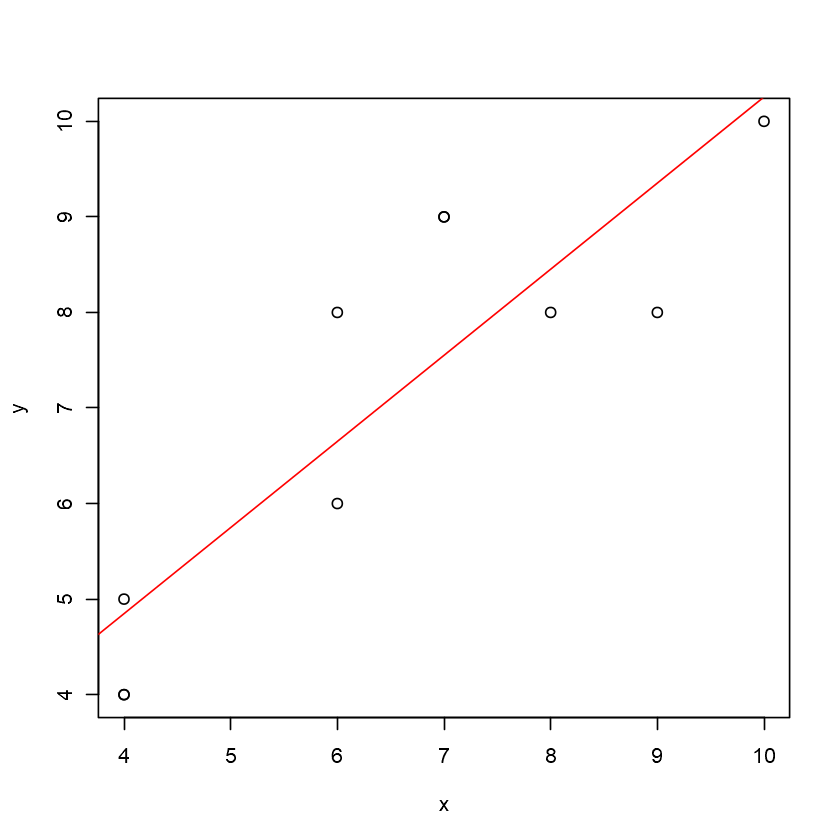

In [39]:
plot(df);
abline(linear_model,col = "red") #BEST FIT LINE of Linear regression


#### The abline function is actually very powerful.We can add any arbitrary lines using this function. For example, we can add a horizontal line at write = 8 as follows.

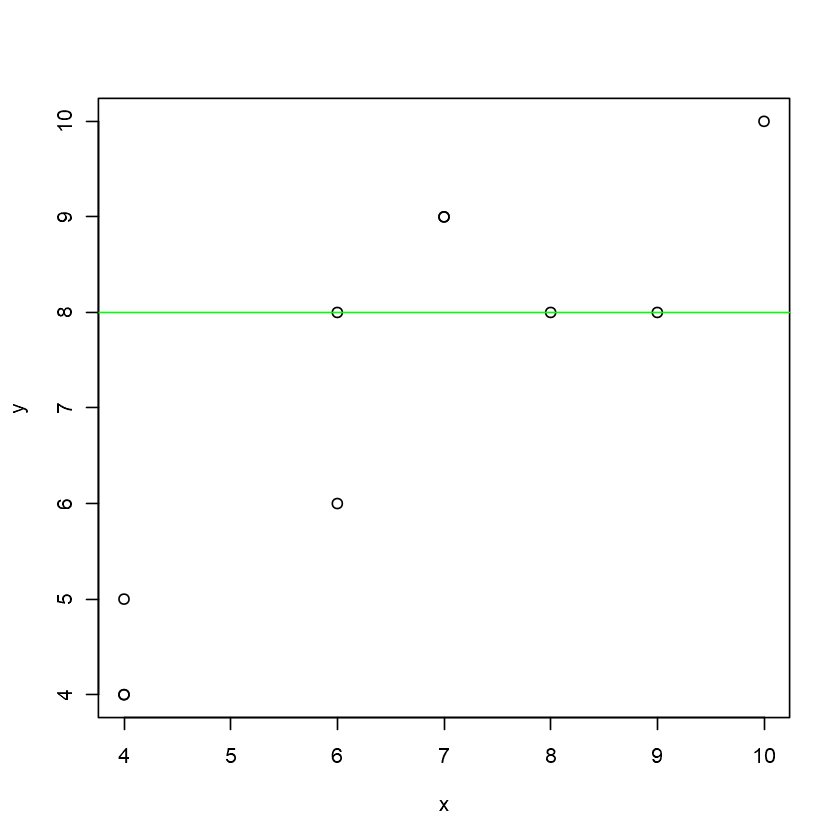

In [40]:
plot(df);abline(df,col = "green",h = 8) 

### Here is another example where we add a line of 45 degree angle passing through the origin. In this type of syntax, the first parameter is the intercept and the second one the slope.

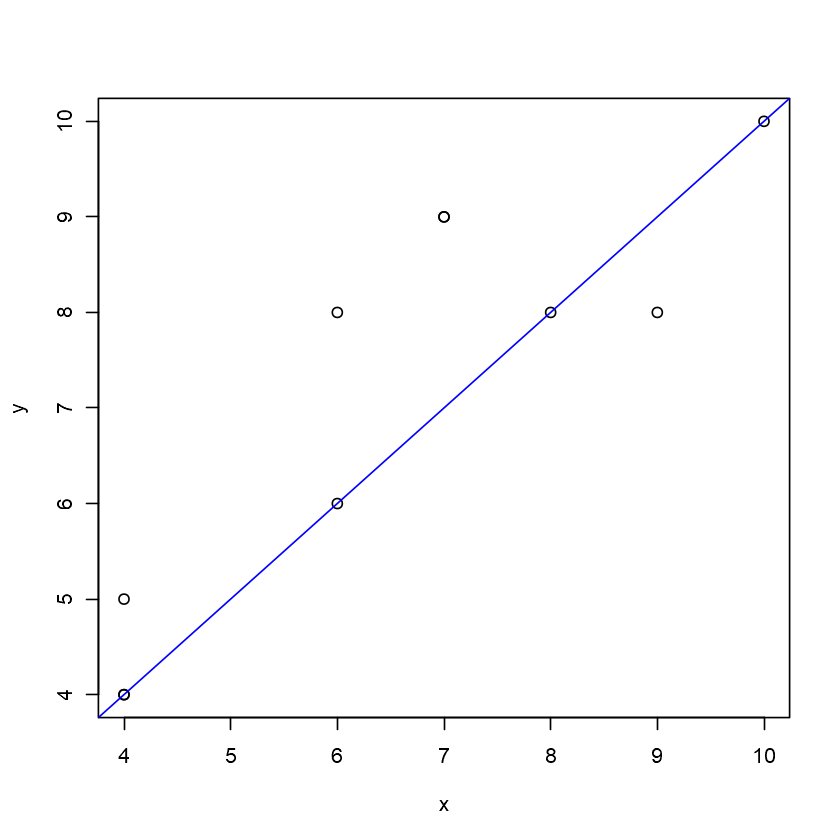

In [41]:
plot(df);abline(0,1,col = "blue") # REFERENCE : tan(45 degree)  = 1 

### Plotting line with slope = 45 degree and intercept = 0.5 unit

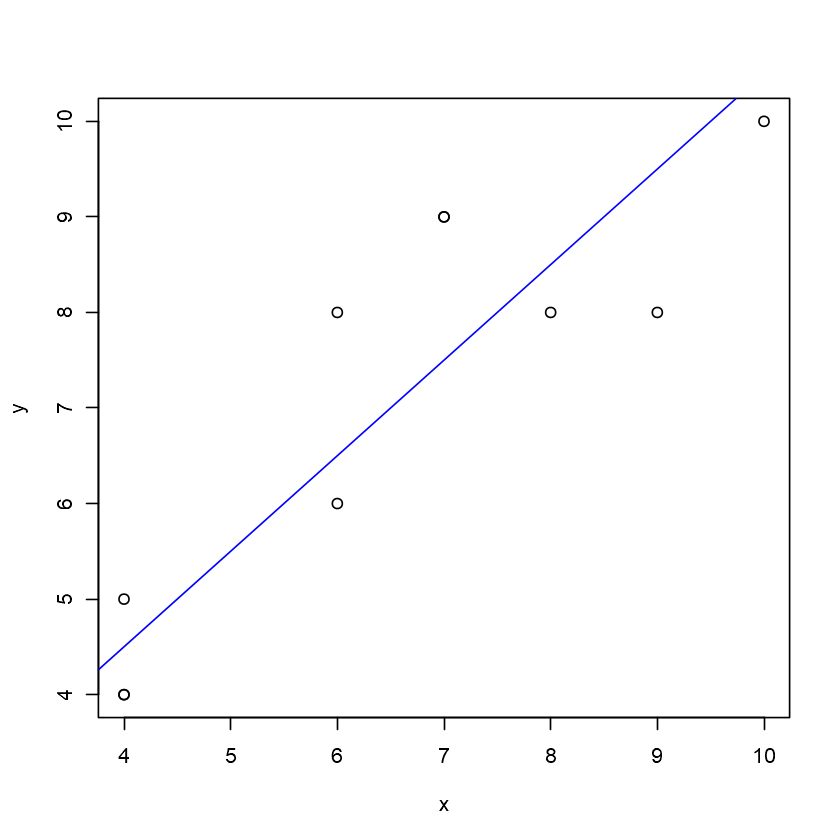

In [42]:
plot(df);abline(0.5,1,col = "blue") # REFERENCE : tan(45 degree)  = 1 

In [43]:
df$predict <- p

In [44]:
df

x,y,predict
4,5,4.846914
6,6,6.649383
9,8,9.353086
10,10,10.254321
4,4,4.846914
6,8,6.649383
4,4,4.846914
7,9,7.550617
8,8,8.451852
7,9,7.550617
